In [1]:
import os
os.sys.path.append('../project_code')

from data.bhsa import book_sets, get_data
from markov.Markov_Chain import *
from PCA.PCA import * 
from Clustering.Clustering_analysis import *
from Distance.Distances import *
from Frequency.Occurences import *

test = get_data(books=["sbh","lbh"])#
features = {'clause_types', 'phrase_functions', 'phrase_types', 'word_pos'}
domain = {'N', 'Q', 'D'}

# Frequencies


In [47]:
data = collections.defaultdict(dict)
for f in features:
    for d in domain:
        countsMatrix = make_counts(test[f][d])
        countsMatrix = transformAverage(countsMatrix) #Standardize the occurences
        data[f][d] = countsMatrix
stack_Data = stackTransitions(data, features, "D")

# Transitions

In [49]:
data = collections.defaultdict(dict)
for f in features:
    for d in domain:
        transMatrix = transitionMatrix(test[f][d], True) 
        if len(transMatrix.keys())>0: 
            transMatrix = MCTransformation(transMatrix) #Here, transformations can be performed
            
            transDict = df_dict_Transformation(transMatrix)
            data[f][d] = pd.DataFrame(transDict).fillna(0)
stack_Data = stackTransitions(data, features, "D")

# Example Dataset

In [7]:
data["phrase_functions"]["N"].head(10)

,Genesis,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Kings,2_Kings,1_Samuel,2_Samuel,1_Chronicles,2_Chronicles,Ezra,Esther,Nehemiah
Adju,75.906920,147.539496,90.623521,170.411294,119.616056,80.206383,124.470879,115.349620,51.009009,86.578612,287.357143,244.530221,336.105525,192.798875,161.542088
Cmpl,549.337943,494.432955,739.297147,641.208597,691.692845,652.183215,553.858586,608.748317,603.382883,627.064508,491.936508,566.451656,463.740534,678.009376,553.858586
Conj,1150.011779,1063.513870,1044.555324,976.254530,1027.657941,1155.295981,1047.323017,1115.542454,1193.342342,1166.709836,989.785714,1019.743050,804.100559,925.434599,1009.638047
Exst,1.755073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.254500,0.000000,5.769360
Frnt,6.142757,10.538535,0.000000,0.000000,10.401396,4.050827,20.622394,9.674484,6.040541,7.565121,11.825397,14.307619,8.509001,3.213315,3.846240
IntS,0.438768,0.000000,0.000000,0.000000,1.040140,0.000000,0.736514,0.744191,0.000000,0.000000,2.365079,6.503463,0.000000,0.000000,0.000000
Intj,18.428270,10.538535,4.769659,5.776654,3.120419,14.582979,11.047711,11.907058,13.423423,10.086829,0.000000,3.902078,0.000000,0.000000,1.923120
Loca,52.652199,107.141777,38.157272,72.208175,57.207679,46.179433,58.184612,59.535288,40.941441,47.071867,48.484127,59.831863,72.326505,35.346460,101.925365
ModS,1.755073,0.000000,0.000000,0.000000,0.000000,1.620331,2.209542,0.000000,0.671171,0.840569,0.000000,0.000000,0.000000,3.213315,0.000000
Modi,37.734076,45.666987,38.157272,25.994943,37.445026,29.976123,33.143133,26.046688,32.887387,42.869021,28.380952,26.013853,29.781502,25.706517,36.539282


# Clustering


Distance measures: 'canberra', 'braycurtis', 'cityblock', 'chebyshev', 'cosine', 'correlation', 'euclidean', 'sqeuclidean'

Clustering methods: 'average', 'centroid', 'complete', 'median', 'single', 'ward', 'weighted'

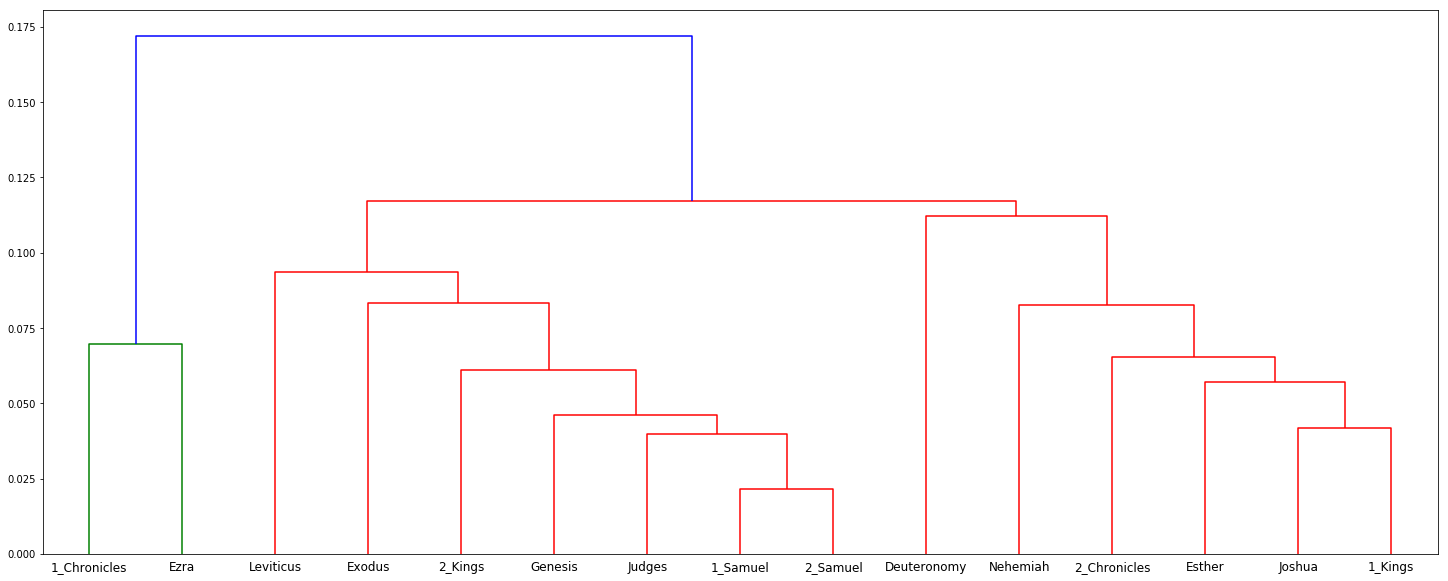

In [8]:
distancemetric = matrixDistances(data["phrase_functions"]["N"].T.values, "braycurtis")
Z = linkageFunction(distancemetric, "weighted")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

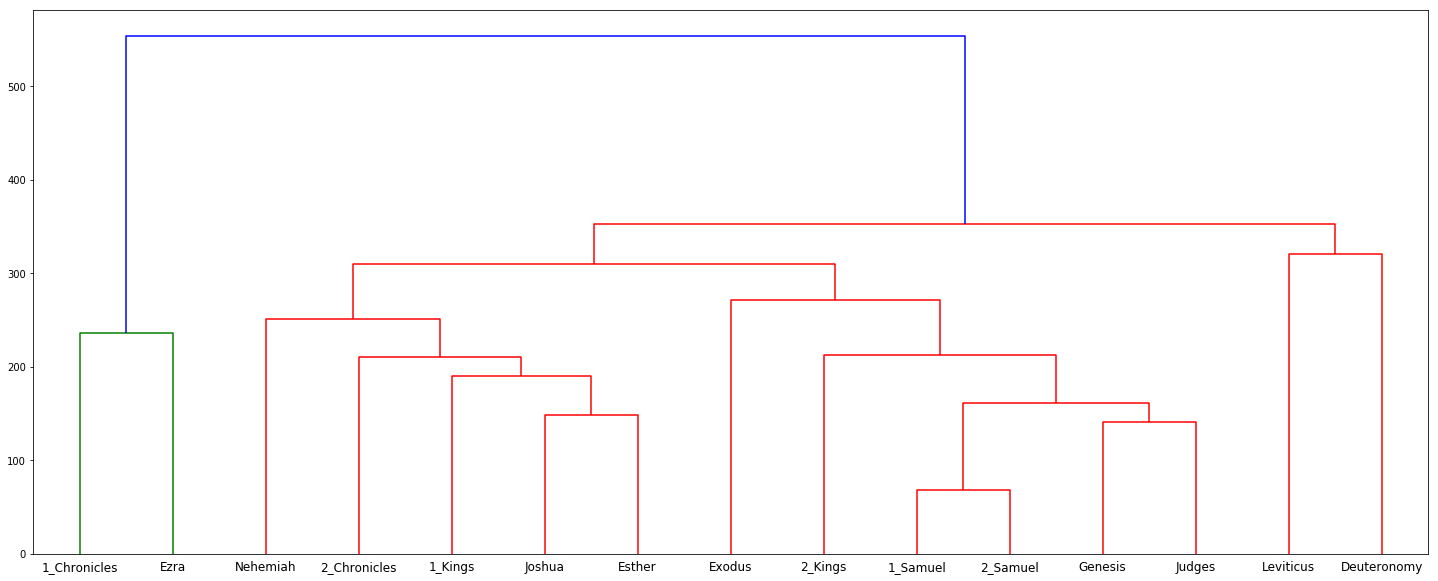

In [9]:
distancemetric = matrixDistances(data["phrase_functions"]["N"].T.values, "euclidean")
Z = linkageFunction(distancemetric, "average")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

## Clustering Analysis

In [40]:
nClusters = 8

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            if not data[f]["N"].empty:
                distancemetric = matrixDistances(data[f]["N"].T.values, metric)
                distancemetric = np.nan_to_num(distancemetric)
                Z = linkageFunction(distancemetric, method)
                flat = flattenClustering(Z, nClusters, "maxclust")
                tag = f+ "|" + metric +"|" +method
                results[tag] = flat

In [41]:
df_Results = pd.DataFrame(results, index = data["phrase_functions"]["N"].keys()).T
df_Results.head(10)

,Genesis,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Kings,2_Kings,1_Samuel,2_Samuel,1_Chronicles,2_Chronicles,Ezra,Esther,Nehemiah
clause_types|braycurtis|average,5,4,6,7,4,5,4,5,5,5,1,4,2,8,3
clause_types|braycurtis|centroid,4,4,6,5,7,4,4,4,4,4,1,4,2,8,3
clause_types|braycurtis|complete,6,5,7,4,5,6,5,4,6,6,1,5,2,8,3
clause_types|braycurtis|median,1,1,7,1,2,1,1,1,1,1,3,1,4,6,5
clause_types|braycurtis|single,3,3,6,5,4,3,3,3,3,3,1,3,2,7,8
clause_types|braycurtis|ward,4,6,5,7,6,4,6,7,4,4,1,6,2,8,3
clause_types|braycurtis|weighted,7,6,4,5,6,7,6,7,7,7,1,6,2,8,3
clause_types|canberra|average,4,4,8,1,2,4,4,4,4,4,3,5,7,6,5
clause_types|canberra|centroid,1,1,8,6,2,1,1,1,1,1,4,1,7,5,3
clause_types|canberra|complete,4,4,7,5,5,4,4,4,1,4,6,1,8,3,2


In [42]:
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
pd.DataFrame(squareFormFunction(distancemetric), index = data["phrase_functions"]["N"].keys(),columns = data["phrase_functions"]["N"].keys())

,Genesis,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Kings,2_Kings,1_Samuel,2_Samuel,1_Chronicles,2_Chronicles,Ezra,Esther,Nehemiah
Genesis,0.000000,0.718750,0.897321,0.973214,0.995536,0.200893,0.830357,0.325893,0.142857,0.160714,1.000000,0.901786,1.000000,1.000000,1.000000
Exodus,0.718750,0.000000,0.870536,0.973214,0.839286,0.656250,0.464286,0.839286,0.714286,0.687500,1.000000,0.397321,0.995536,0.580357,1.000000
Leviticus,0.897321,0.870536,0.000000,0.968750,0.950893,0.897321,1.000000,1.000000,0.870536,0.870536,1.000000,1.000000,1.000000,1.000000,1.000000
Deuteronomy,0.973214,0.973214,0.968750,0.000000,0.986607,0.973214,0.830357,0.901786,0.973214,0.973214,1.000000,0.861607,1.000000,1.000000,1.000000
Joshua,0.995536,0.839286,0.950893,0.986607,0.000000,0.973214,0.799107,0.991071,0.991071,0.986607,0.991071,0.678571,0.977679,0.651786,1.000000
Judges,0.200893,0.656250,0.897321,0.973214,0.973214,0.000000,0.647321,0.348214,0.308036,0.325893,1.000000,0.825893,1.000000,0.946429,1.000000
1_Kings,0.830357,0.464286,1.000000,0.830357,0.799107,0.647321,0.000000,0.732143,0.852679,0.843750,1.000000,0.254464,1.000000,0.544643,1.000000
2_Kings,0.325893,0.839286,1.000000,0.901786,0.991071,0.348214,0.732143,0.000000,0.410714,0.401786,1.000000,0.892857,1.000000,0.973214,1.000000
1_Samuel,0.142857,0.714286,0.870536,0.973214,0.991071,0.308036,0.852679,0.410714,0.000000,0.026786,1.000000,0.910714,1.000000,1.000000,1.000000
2_Samuel,0.160714,0.687500,0.870536,0.973214,0.986607,0.325893,0.843750,0.401786,0.026786,0.000000,1.000000,0.910714,0.995536,1.000000,1.000000


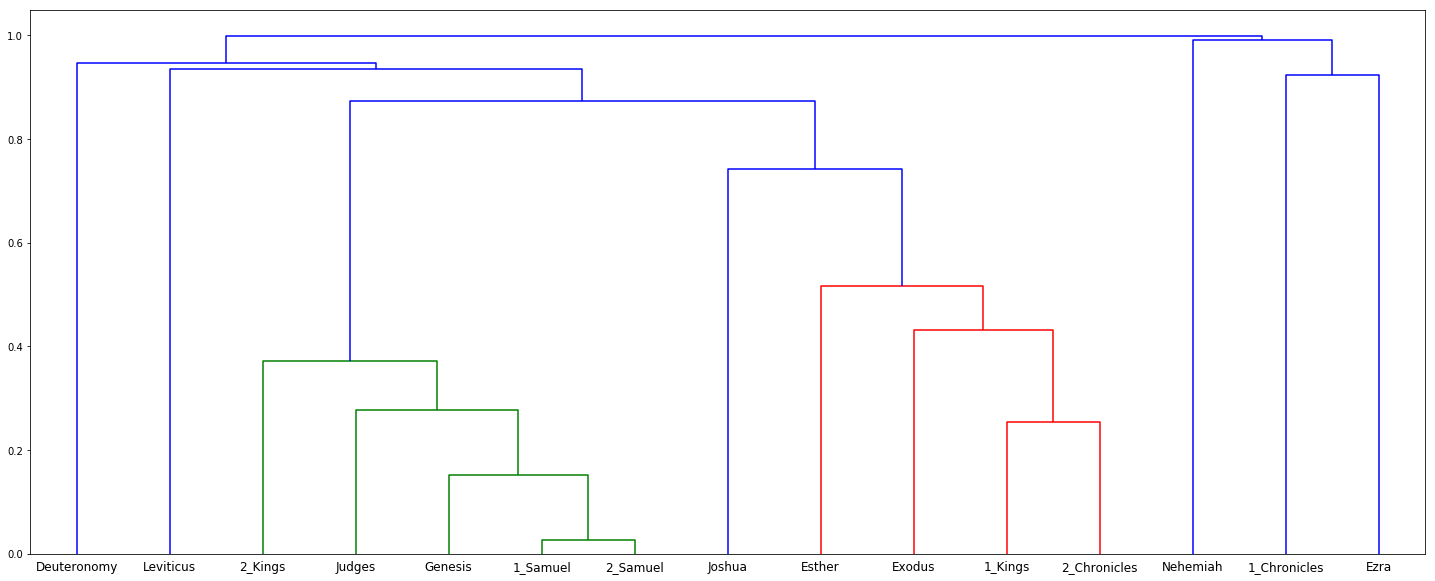

In [43]:
Z = linkageFunction(distancemetric, "average")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

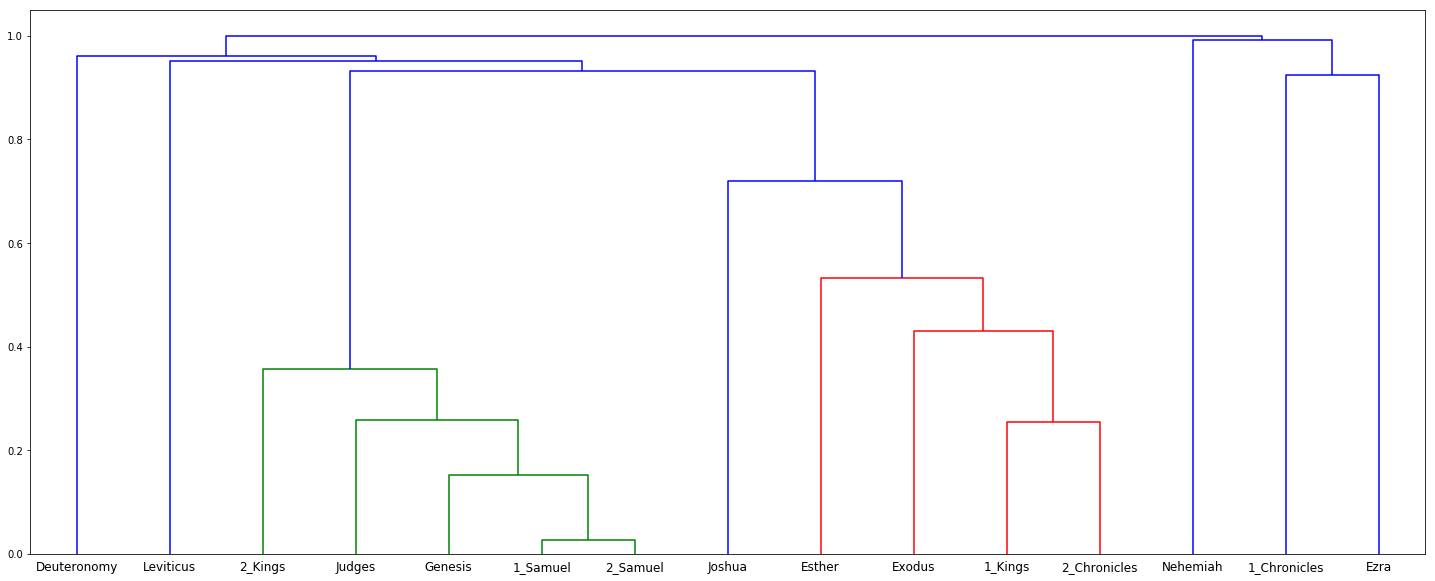

In [44]:
Z = linkageFunction(distancemetric, "weighted")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

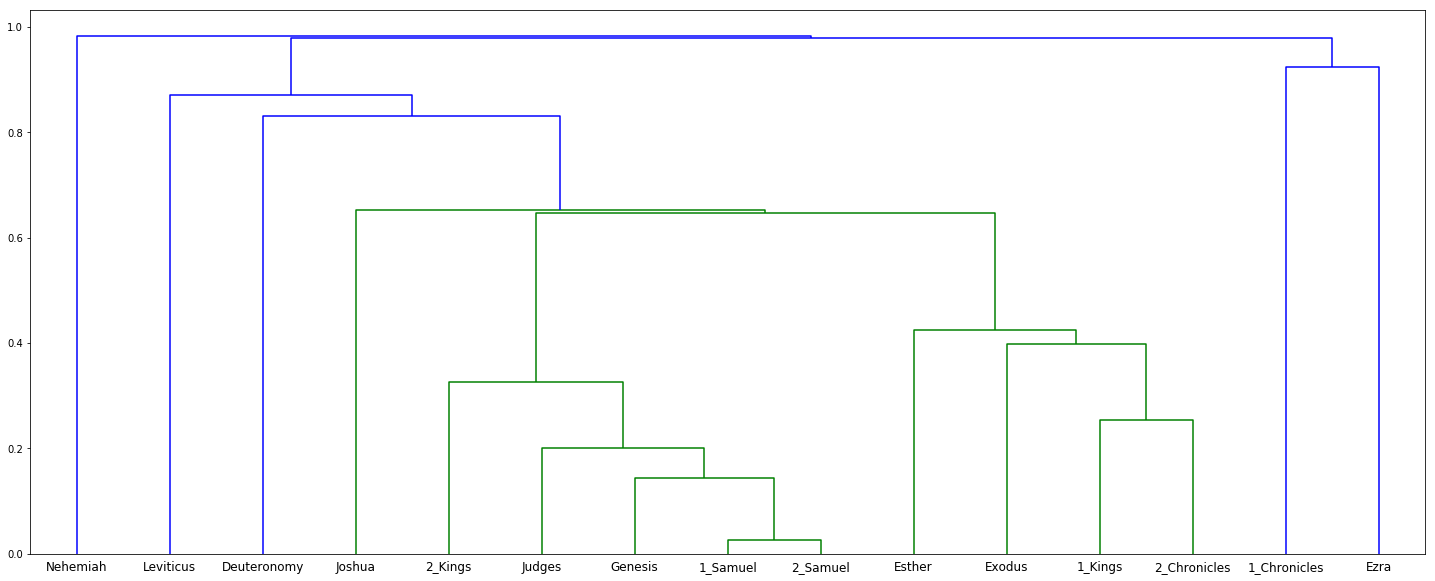

In [45]:
Z = linkageFunction(distancemetric, "single")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

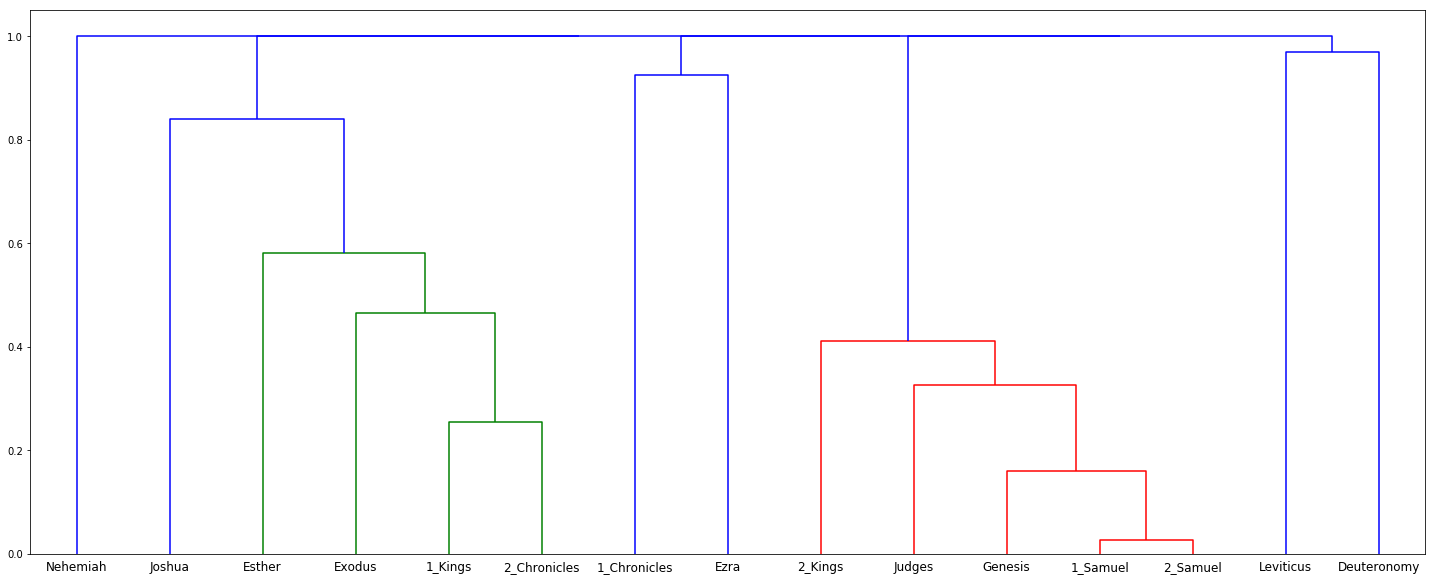

In [46]:
Z = linkageFunction(distancemetric, "complete")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

# PCA

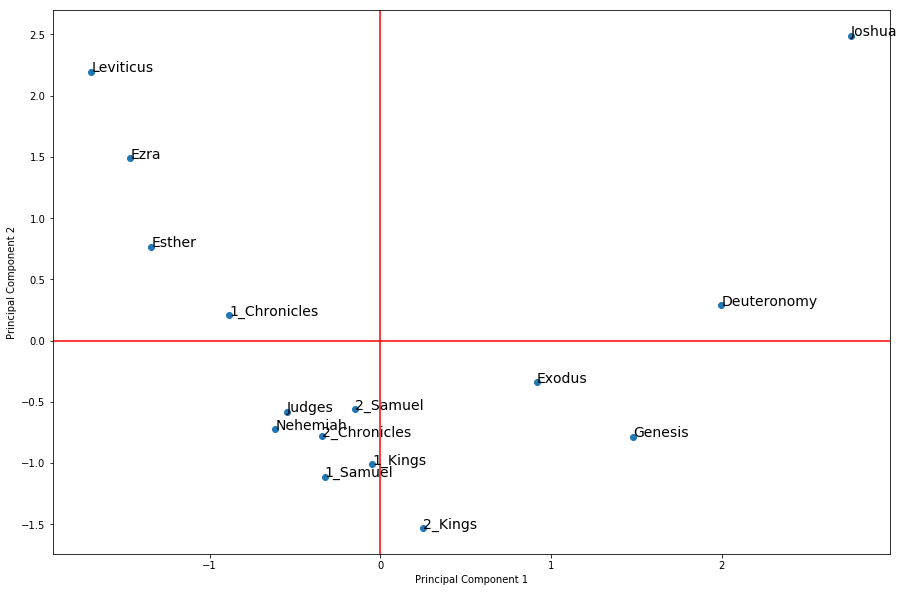

In [50]:
pca = PCA(n_components=3)
fit = pca.fit_transform(stack_Data.T.values) 
plt.figure(1, figsize=(15, 10))     
plt.scatter(fit[:, 0], fit[:, 1])
books = stack_Data.keys()
for i, book in enumerate(books):
    plt.annotate(book, xy=(fit[i, 0], fit[i, 1]), fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color="r", linestyle='-')
plt.show()